<a href="https://colab.research.google.com/github/ustab/CAPS_PROJECT-11-22-DS-F1218-B-USTA/blob/main/DAwPy_Capstone_Project_(AutoScout)_Student_(3_HANDLING_WITH_OUTLIERS_final_dummy_operation_F_1218_B_USTA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

 PART 3- HANDLING WITH OUTLIERS / FINAL STEP / DUMMY OPEARATION

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [1]:
pip install skimpy --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [4]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [5]:
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [6]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv('/content/filled_scout.csv')
df

,Unnamed: 0,make_model,body_type,price,km,Type,Cylinders,Drive_chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,description,Gears,age,hp_kW,Upholstery_type,Nr_of_Doors,Nr_of_Seats,Displacement_cc,Weight_kg,cons_comb
0,0,Audi A1,Sedans,15770,56013.00,Used,3.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","['\n', 'Sicherheit:', ' ', 'Deaktivierung für ...",-,3.00,66.00,Cloth,5.00,5.00,1422.00,1220.00,3.80
1,1,Audi A1,Sedans,14500,80000.00,Used,4.0,front,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",['\nLangstreckenfahrzeug daher die hohe Kilome...,7.0,2.00,141.00,Cloth,3.00,4.00,1798.00,1255.00,5.60
2,2,Audi A1,Sedans,14640,83450.00,Used,-,front,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","['\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem...",-,3.00,85.00,Cloth,4.00,4.00,1598.00,1135.00,3.80
3,3,Audi A1,Sedans,14500,73000.00,Used,3.0,front,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","['\nAudi A1: ', '- 1e eigenaar ', '- Perfecte ...",6.0,3.00,66.00,Cloth,3.00,4.00,1422.00,1195.00,3.80
4,4,Audi A1,Sedans,16790,16200.00,Used,3.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","['\n', 'Technik & Sicherheit:', 'Xenon plus', ...",-,3.00,66.00,Cloth,5.00,5.00,1422.00,1135.00,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,15914,Renault Espace,Van,39950,1647.36,New,4.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",['\nVettura visionabile nella sede in Via Roma...,6.0,0.00,147.00,Part/Full Leather,5.00,5.00,1997.00,1758.00,5.30
15915,15915,Renault Espace,Van,39885,9900.00,Used,4.0,front,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...","['\nDach: Panorama-Glas-Schiebedach, Lackierun...",7.0,0.00,165.00,Cloth,5.00,5.00,1798.00,1708.00,7.40
15916,15916,Renault Espace,Van,39875,15.00,Pre-registered,4.0,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...","['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",6.0,0.00,146.00,Part/Full Leather,5.00,7.00,1997.00,1734.00,5.30
15917,15917,Renault Espace,Van,39700,10.00,Pre-registered,4.0,front,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...","['\nDEK:[2691331]', 'Renault Espace Blue dCi 2...",6.0,0.00,147.00,Part/Full Leather,5.00,7.00,1997.00,1758.00,5.30


In [9]:
df.shape

(15919, 23)

In [10]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.00,80000.00,83450.00,73000.00,16200.00
Type,Used,Used,Used,Used,Used
Cylinders,3.0,4.0,-,3.0,3.0
Drive_chain,front,front,front,front,front
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."


In [11]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6692
--------------------------------
10.00       1045
1647.36      985
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6692, dtype: int64


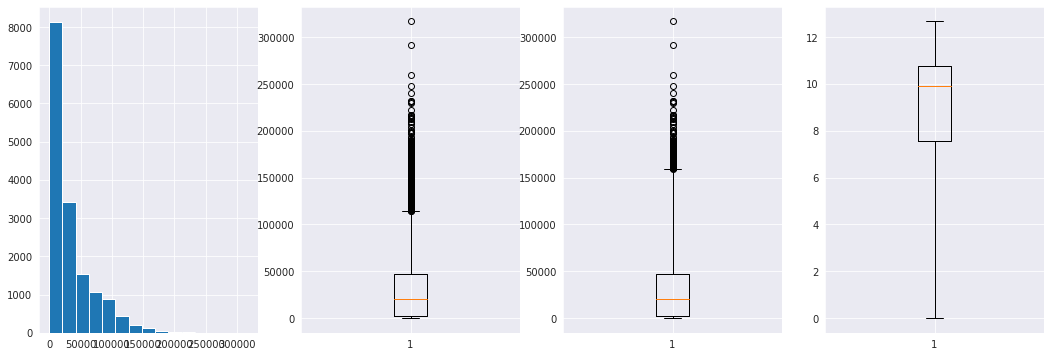

In [12]:
plt.figure(figsize=(18, 6))
plt.subplot(141)
plt.hist(df.km, bins=15)
plt.subplot(142)
plt.boxplot(df.km)
plt.subplot(143)
plt.boxplot(df.km, whis=2.5)
plt.subplot(144)
plt.boxplot(np.log(df.km), whis=2.5)
plt.show()

In [13]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
--------------------------------
6.0     5822
-       4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: Gears, dtype: int64


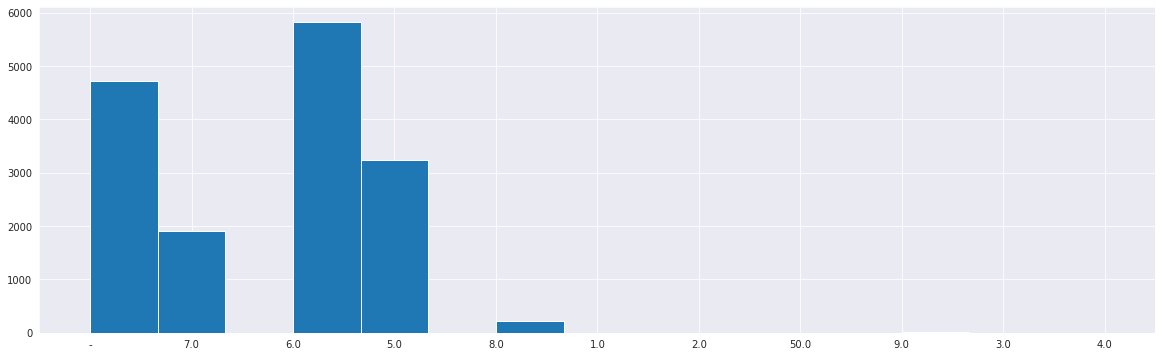

In [14]:
plt.figure(figsize=(20, 6))
plt.hist(df.Gears, bins=15)
plt.show()

In [15]:
df.Gears.describe()

count     15919
unique       11
top         6.0
freq       5822
Name: Gears, dtype: object

In [16]:
df.sort_values(by=["Gears"], ascending=False)["Gears"].head(10)

15869    9.0
15876    9.0
15812    9.0
15814    9.0
15827    9.0
15824    9.0
11388    8.0
12616    8.0
12464    8.0
11819    8.0
Name: Gears, dtype: object

In [17]:
df.sort_values(by=["Gears"], ascending=True)["Gears"].head(10)

0       -
7657    -
7653    -
7651    -
7647    -
7646    -
7641    -
7637    -
7625    -
7622    -
Name: Gears, dtype: object

In [18]:
df[(df.make_model == "Renault Espace")][["make_model", "body_type", "Gears"]]

,make_model,body_type,Gears
14928,Renault Espace,Van,-
14929,Renault Espace,Station wagon,6.0
14930,Renault Espace,Transporter,6.0
14931,Renault Espace,Van,-
14932,Renault Espace,Van,6.0
...,...,...,...
15914,Renault Espace,Van,6.0
15915,Renault Espace,Van,7.0
15916,Renault Espace,Van,6.0
15917,Renault Espace,Van,6.0


In [19]:
df["Gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [20]:
df.Gears.isnull().sum()

0

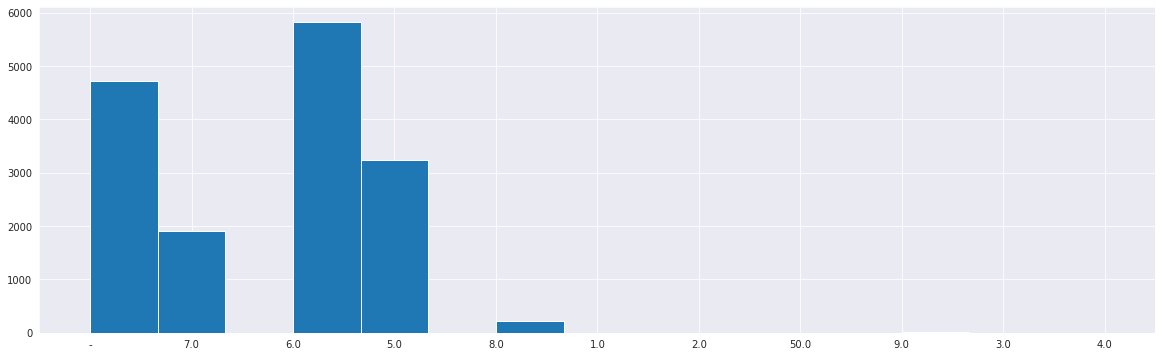

In [21]:
plt.figure(figsize=(20, 6))
plt.hist(df.Gears, bins=15)
plt.show()

In [22]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
--------------------------------
1598.00     5044
999.00      2467
1398.00     1387
1399.00      768
1229.00      678
1956.00      670
1461.00      667
1490.00      559
1422.00      467
1197.00      372
898.00       351
1395.00      320
1968.00      301
1149.00      288
1618.00      212
1798.00      210
1498.00      196
1600.00      130
1248.00      110
1997.00      103
1364.00      102
1400.00       90
998.00        72
1500.00       50
2000.00       46
1000.00       40
1.00          36
1998.00       25
2480.00       20
1200.00       18
1984.00       18
1397.00       11
899.00        11
160.00         6
929.00         5
1499.00        5
997.00         4
1596.00        4
139.00         4
900.00         4
1599.00        3
1199.00        3
1396.00        3
1495.00        2
1589.00        2
1300.00        2
2.00           2
995.00         2
1496.00        1
89

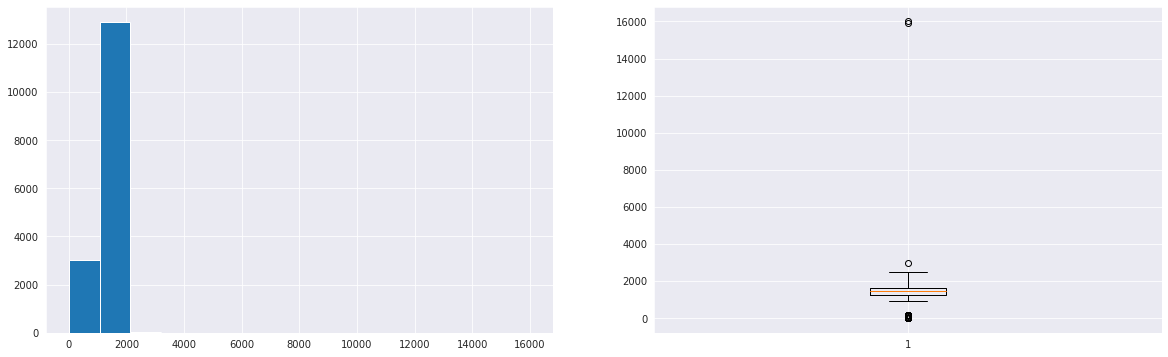

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins=15)
plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)
plt.show()

In [24]:
df.Displacement_cc.describe()

count   15919.00
mean     1425.61
std       329.72
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: Displacement_cc, dtype: float64

In [25]:
df.sort_values(by=["Displacement_cc"], ascending=False)["Displacement_cc"].head(5)

10932   16000.00
7169    15898.00
10771    2967.00
3595     2480.00
3587     2480.00
Name: Displacement_cc, dtype: float64

In [26]:
df.sort_values(by=["Displacement_cc"], ascending=True)["Displacement_cc"].head(55)

12790     1.00
14319     1.00
14315     1.00
12849     1.00
12848     1.00
12835     1.00
12823     1.00
12815     1.00
12800     1.00
12798     1.00
12796     1.00
12786     1.00
12783     1.00
12781     1.00
12769     1.00
12768     1.00
12750     1.00
12670     1.00
12604     1.00
12554     1.00
12501     1.00
12499     1.00
12484     1.00
12473     1.00
12467     1.00
14284     1.00
14320     1.00
14321     1.00
14314     1.00
14322     1.00
14328     1.00
14327     1.00
13904     1.00
14325     1.00
14326     1.00
14324     1.00
10559     2.00
14198     2.00
13912    54.00
10194   122.00
7810    139.00
7812    139.00
7811    139.00
7809    139.00
8128    140.00
15578   160.00
15576   160.00
15574   160.00
15575   160.00
15577   160.00
15579   160.00
13653   890.00
14694   898.00
14342   898.00
14695   898.00
Name: Displacement_cc, dtype: float64

In [27]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [28]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [29]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [30]:
df.Displacement_cc.isnull().sum()

53

In [31]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.00    5077
999.00     2467
1398.00    1388
1399.00     772
1461.00     682
1229.00     678
1956.00     670
1490.00     559
1422.00     467
1197.00     372
898.00      351
1395.00     320
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     130
1248.00     110
1997.00     103
1364.00     102
1400.00      90
998.00       72
1500.00      50
2000.00      46
1000.00      40
1998.00      25
2480.00      20
1984.00      18
1200.00      18
1397.00      11
899.00       11
929.00        5
1499.00       5
997.00        4
900.00        4
1596.00       4
1599.00       3
1396.00       3
1199.00       3
1589.00       2
1300.00       2
1495.00       2
995.00        2
890.00        1
1333.00       1
1580.00       1
1995.00       1
1533.00       1
1100.00       1
1198.00       1
1496.00       1
1368.00       1
1896.00       1
1584.00       1
1568.00       1
996.00        1
1696.00       1
1686.00       1
973.00        1
18

In [32]:
df.Displacement_cc.isnull().sum()


0

In [33]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.00    5077
999.00     2467
1398.00    1388
1399.00     772
1461.00     682
1229.00     678
1956.00     670
1490.00     559
1422.00     467
1197.00     372
898.00      351
1395.00     320
1968.00     301
1149.00     288
1618.00     212
1798.00     210
1498.00     196
1600.00     130
1248.00     110
1997.00     103
1364.00     102
1400.00      90
998.00       72
1500.00      50
2000.00      46
1000.00      40
1998.00      25
2480.00      20
1984.00      18
1200.00      18
1397.00      11
899.00       11
929.00        5
1499.00       5
997.00        4
900.00        4
1596.00       4
1599.00       3
1396.00       3
1199.00       3
1589.00       2
1300.00       2
1495.00       2
995.00        2
890.00        1
1333.00       1
1580.00       1
1995.00       1
1533.00       1
1100.00       1
1198.00       1
1496.00       1
1368.00       1
1896.00       1
1584.00       1
1568.00       1
996.00        1
1696.00       1
1686.00       1
973.00        1
18

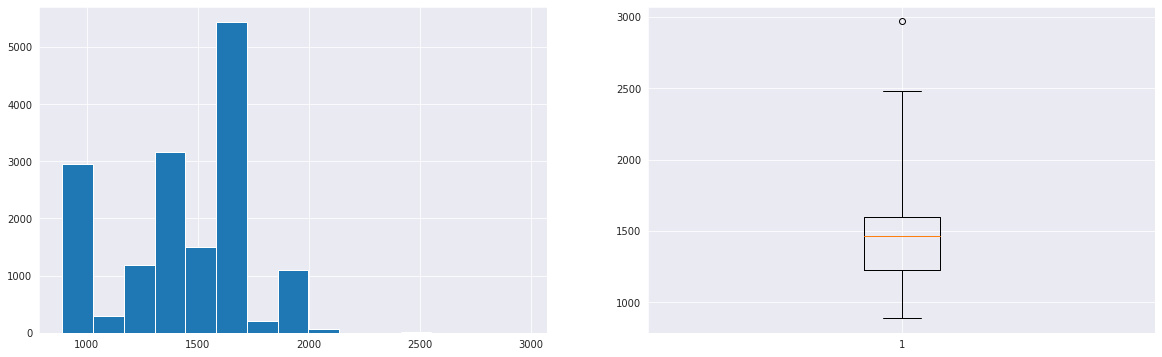

In [34]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins=15)
plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis=2.5)
plt.show()

In [35]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  434
--------------------------------
1163.00    1582
1360.00    1419
1487.00     966
1135.00     837
1425.00     744
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: Weight_kg, Length: 434, dtype: int64


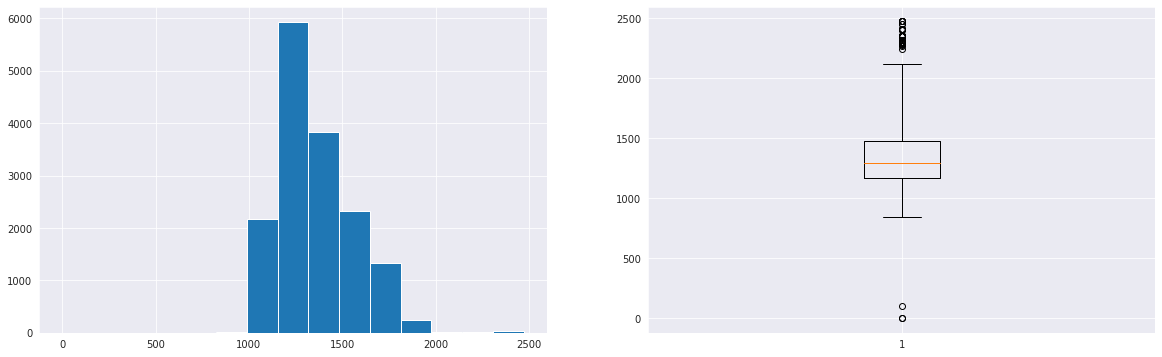

In [36]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)
plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)
plt.show()

In [37]:
df.Weight_kg.describe()

count   15919.00
mean     1337.43
std       200.47
min         1.00
25%      1165.00
50%      1295.00
75%      1472.00
max      2471.00
Name: Weight_kg, dtype: float64

In [38]:
df["Weight_kg"].sort_values().head(10)

8355      1.00
12779     1.00
1143    102.00
8857    840.00
14313   900.00
13513   977.00
13555   977.00
14654   980.00
14105   980.00
13999   980.00
Name: Weight_kg, dtype: float64

In [39]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [40]:
df["Weight_kg"].isnull().sum()

3

In [41]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.00    1583
1360.00    1419
1487.00     967
1135.00     837
1425.00     744
           ... 
1331.00       1
1132.00       1
1252.00       1
1792.00       1
2037.00       1
Name: Weight_kg, Length: 432, dtype: int64


In [42]:
df["Weight_kg"].isnull().sum()

0

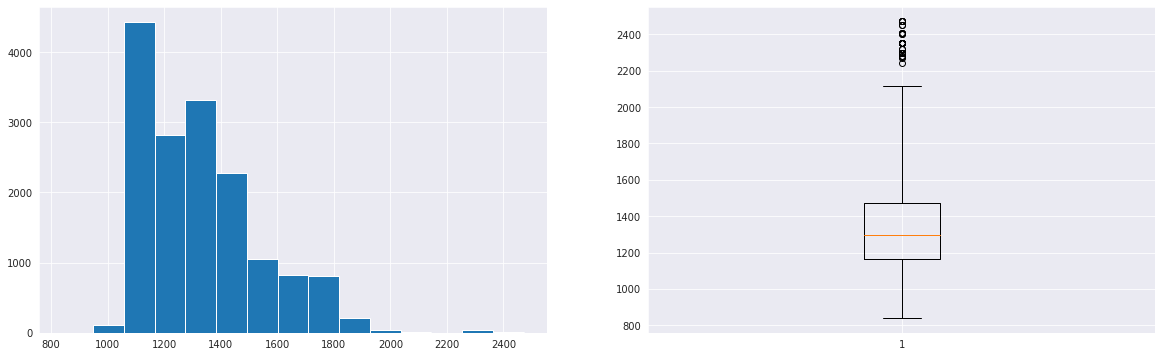

In [43]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)
plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)
plt.show()

In [44]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  80
--------------------------------
85.00     2543
66.00     2133
81.00     1402
100.00    1309
110.00    1113
70.00      889
125.00     710
51.00      695
55.00      581
118.00     539
92.00      466
121.00     393
147.00     384
77.00      345
56.00      295
54.00      277
103.00     254
87.00      237
165.00     200
88.00      179
60.00      161
162.00      98
74.00       81
96.00       72
71.00       59
101.00      49
67.00       40
154.00      39
122.00      35
119.00      32
164.00      27
135.00      24
52.00       22
82.00       22
1.00        20
78.00       20
146.00      18
294.00      18
141.00      16
57.00       10
120.00       8
104.00       8
117.00       7
112.00       7
191.00       7
155.00       6
184.00       5
65.00        4
90.00        4
76.00        4
168.00       3
98.00        3
149.00       3
80.00        3
93.00        3
53.00        2
86.00

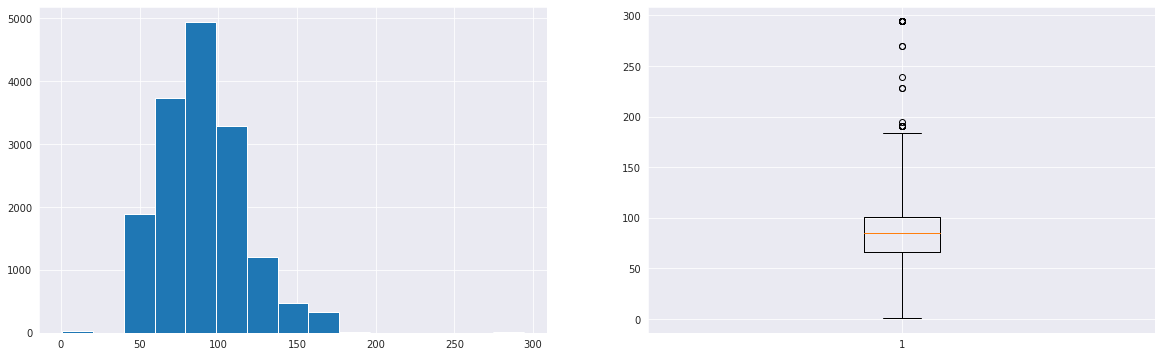

In [45]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.hp_kW, bins=15)
plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)
plt.show()

In [46]:
df.hp_kW.describe()

count   15919.00
mean       88.41
std        26.89
min         1.00
25%        66.00
50%        85.00
75%       101.00
max       294.00
Name: hp_kW, dtype: float64

In [47]:
df.hp_kW.sort_values().head(50)

7019     1.00
10579    1.00
7018     1.00
10580    1.00
10610    1.00
6946     1.00
9288     1.00
7014     1.00
6034     1.00
9299     1.00
7016     1.00
9290     1.00
9289     1.00
9285     1.00
6005     1.00
9287     1.00
15155    1.00
15156    1.00
9292     1.00
10468    1.00
13885    4.00
3913     9.00
8857    40.00
13759   40.00
8408    44.00
10363   51.00
10352   51.00
9036    51.00
10384   51.00
10353   51.00
9613    51.00
10381   51.00
10380   51.00
10379   51.00
10354   51.00
10355   51.00
10378   51.00
10377   51.00
10356   51.00
10376   51.00
9616    51.00
10361   51.00
10365   51.00
10360   51.00
10358   51.00
10367   51.00
10364   51.00
10368   51.00
10357   51.00
10370   51.00
Name: hp_kW, dtype: float64

In [48]:
np.sort(df.hp_kW.unique())

array([  1.,   4.,   9.,  40.,  44.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  60.,  63.,  65.,  66.,  67.,  70.,  71.,  74.,  75.,  76.,
        77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  92.,  93.,  96.,  98., 100., 101., 103., 104., 110., 112.,
       115., 117., 118., 119., 120., 121., 122., 123., 125., 127., 132.,
       133., 135., 137., 140., 141., 143., 146., 147., 149., 150., 154.,
       155., 162., 163., 164., 165., 167., 168., 184., 191., 195., 228.,
       239., 270., 294.])

In [49]:
df.hp_kW.loc[df.hp_kW < 51] = np.nan

In [50]:
df.hp_kW.isnull().sum()

25

In [51]:
fill(df, "make_model", "body_type","hp_kW", "mode")

Number of NaN :  0
------------------
85.00     2544
66.00     2135
81.00     1402
100.00    1312
110.00    1117
70.00      889
125.00     714
51.00      702
55.00      581
118.00     541
92.00      466
121.00     393
147.00     384
77.00      345
56.00      297
54.00      277
103.00     254
87.00      237
165.00     200
88.00      179
60.00      161
162.00      98
74.00       81
96.00       72
71.00       59
101.00      49
67.00       40
154.00      39
122.00      35
119.00      32
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
117.00       7
112.00       7
155.00       6
184.00       5
90.00        4
76.00        4
65.00        4
80.00        3
93.00        3
168.00       3
149.00       3
98.00        3
150.00       2
228.00       2
270.00       2
53.00        2
86.00        2
167.00       2
63.00        2
127.00       2
89.00        2
143.00       2
14

In [52]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 12.33
num_of_nulls   :  1963
num_of_uniques :  68
--------------------------------
NaN      1963
5.40      770
3.90      734
4.00      713
5.10      657
4.40      623
5.60      618
4.70      607
3.80      585
4.80      546
5.00      545
4.50      524
5.20      454
4.20      435
4.60      426
4.90      393
5.50      380
5.30      380
5.90      370
3.70      369
4.10      342
5.70      342
6.00      331
3.30      307
4.30      307
3.50      288
3.60      231
6.20      216
6.30      181
6.10      175
5.80      165
6.60      148
6.80      136
3.40      125
6.40       75
3.00       69
7.40       66
6.70       43
6.50       43
7.10       38
6.90       27
3.20       25
3.65       20
8.30       20
5.15       19
7.60       14
7.00       10
3.10        7
7.20        6
7.80        6
53.00       5
8.00        5
1.60        5
8.60        4
3.95        3
8.70        3
7.90        3
5.45        2
39.00       2
7.30      

In [53]:
fill(df, "make_model", "body_type","cons_comb", "mode")

Number of NaN :  0
------------------
5.40     1005
4.00      957
4.70      775
3.90      735
4.50      710
4.80      685
5.10      676
4.40      666
5.60      618
5.70      599
3.80      586
5.00      566
5.20      543
5.30      535
3.30      513
4.30      442
4.20      436
4.60      433
3.70      424
4.90      393
5.50      381
5.90      370
4.10      342
6.00      331
3.50      288
3.60      231
6.20      216
6.30      181
6.10      175
5.80      165
6.60      148
6.80      136
3.40      125
6.40       75
3.00       69
7.40       66
6.50       43
6.70       43
7.10       38
6.90       27
3.20       25
3.65       20
8.30       20
5.15       19
7.60       14
7.00       10
3.10        7
7.80        6
7.20        6
1.60        5
53.00       5
8.00        5
8.60        4
8.70        3
3.95        3
7.90        3
39.00       2
7.30        2
5.45        2
41.00       2
8.10        2
5.95        1
4.55        1
4.45        1
9.10        1
12.05       1
7.50        1
15.10       1
Name: cons

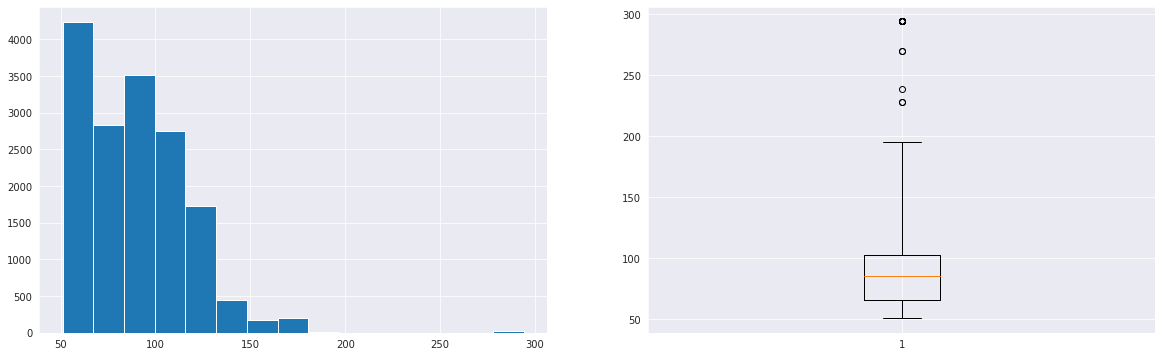

In [54]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.hp_kW, bins=15)
plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)
plt.show()

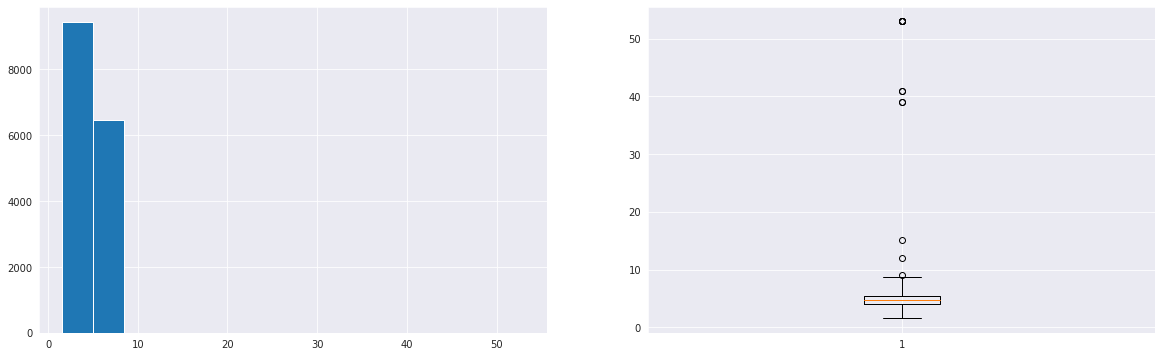

In [55]:
plt.figure(figsize = (20, 6))
plt.subplot(121)
plt.hist(df.cons_comb, bins = 15)
plt.subplot(122)
plt.boxplot(df.cons_comb, whis = 2.5)
plt.show()

In [56]:
df.cons_comb.describe()

count   15919.00
mean        4.84
std         1.35
min         1.60
25%         4.00
50%         4.80
75%         5.40
max        53.00
Name: cons_comb, dtype: float64

In [57]:
df.cons_comb.sort_values().head(10)

3617    1.60
13397   1.60
3615    1.60
3356    1.60
3612    1.60
2863    3.00
10740   3.00
6173    3.00
811     3.00
13928   3.00
Name: cons_comb, dtype: float64

In [58]:
df.cons_comb.sort_values().tail(10)

535     15.10
4558    39.00
4556    39.00
4102    41.00
4089    41.00
14584   53.00
2237    53.00
2210    53.00
2196    53.00
2194    53.00
Name: cons_comb, dtype: float64

In [59]:
df.columns

Index(['Unnamed: 0', 'make_model', 'body_type', 'price', 'km', 'Type',
       'Cylinders', 'Drive_chain', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'description',
       'Gears', 'age', 'hp_kW', 'Upholstery_type', 'Nr_of_Doors',
       'Nr_of_Seats', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')

In [60]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.00    11719
4.00     3123
3.00      853
2.00      222
1.00        1
7.00        1
Name: Nr_of_Doors, dtype: int64


In [61]:
df.Nr_of_Doors.replace([1, 7], np.nan, inplace=True)

In [62]:
df.Nr_of_Doors.isnull().sum()

2

In [63]:
fill(df, "make_model", "body_type", "Nr_of_Doors", "mode")

Number of NaN :  0
------------------
5.00    11721
4.00     3123
3.00      853
2.00      222
Name: Nr_of_Doors, dtype: int64


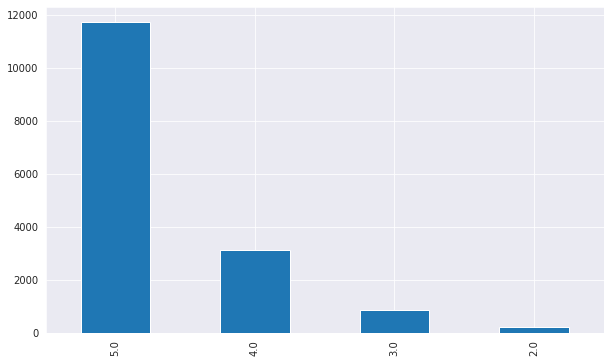

In [64]:
fig, ax = plt.subplots()
df.Nr_of_Doors.value_counts(dropna = False).plot.bar()
plt.show()

In [65]:
df.columns

Index(['Unnamed: 0', 'make_model', 'body_type', 'price', 'km', 'Type',
       'Cylinders', 'Drive_chain', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'description',
       'Gears', 'age', 'hp_kW', 'Upholstery_type', 'Nr_of_Doors',
       'Nr_of_Seats', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')

In [66]:
df.drop("Nr_of_Doors", axis=1, inplace=True)

In [67]:
first_looking("Nr_of_Seats")

column name    :  Nr_of_Seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
--------------------------------
5.00    14181
4.00     1188
7.00      417
2.00      130
6.00        2
3.00        1
Name: Nr_of_Seats, dtype: int64


In [68]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [69]:
df.Nr_of_Seats.isnull().sum()

3

In [70]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.00    14184
4.00     1188
7.00      417
2.00      130
Name: Nr_of_Seats, dtype: int64


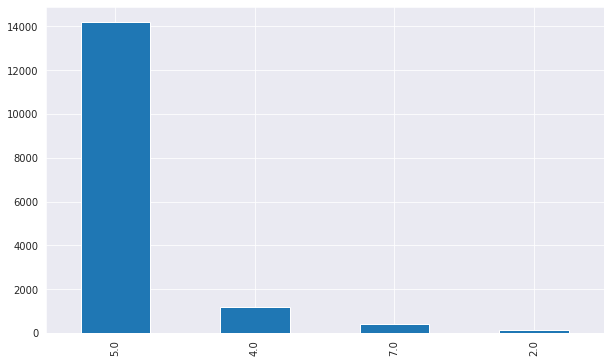

In [71]:
df.Nr_of_Seats.value_counts(dropna=False).plot.bar()
plt.show()

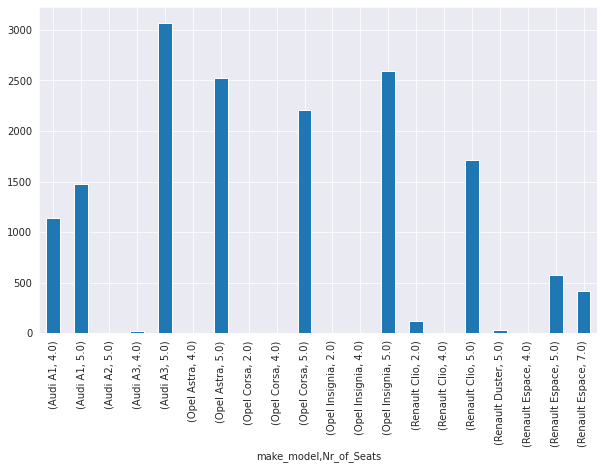

In [72]:
fig, ax = plt.subplots()
df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar()

In [73]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

In [74]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2956
--------------------------------
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64


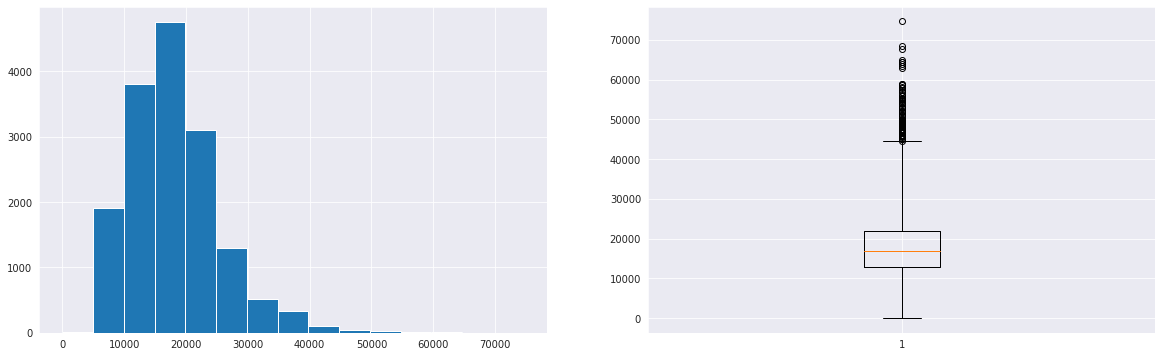

In [75]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.price, bins=15)
plt.subplot(122)
plt.boxplot(df.price, whis=2.5)
plt.show()

In [76]:
df.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [77]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [78]:
drop_index = df.price.sort_values().index[:4]
drop_index

Int64Index([8594, 8828, 6066, 8829], dtype='int64')

In [79]:
df.drop(drop_index, axis=0, inplace=True)


In [80]:
df.shape

(15915, 21)

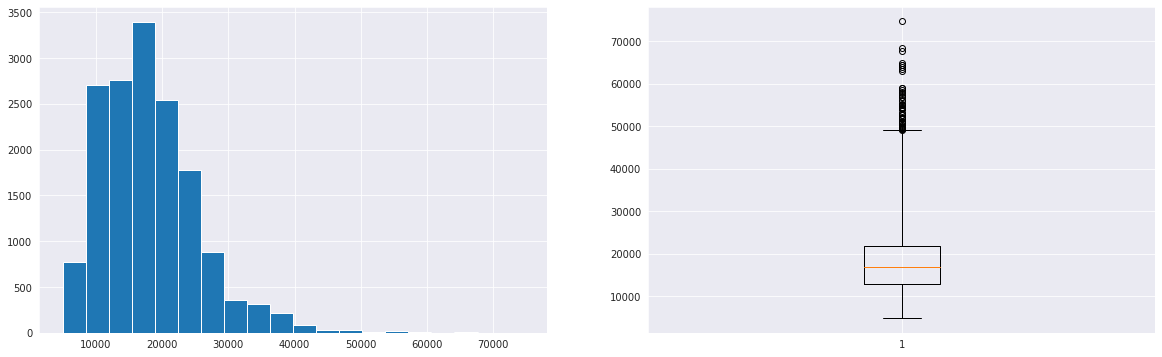

In [81]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.hist(df.price, bins=20)
plt.subplot(122)
plt.boxplot(df.price, whis=3)
plt.show()

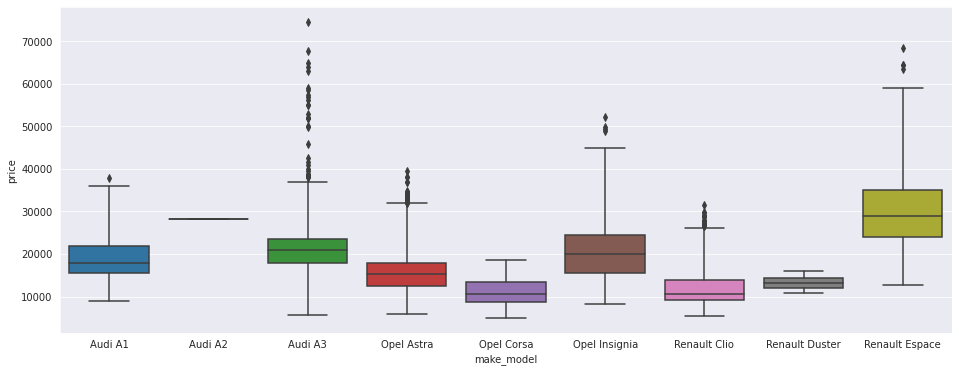

In [82]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="make_model", y="price", data=df, whis=2.5)
plt.show()

In [83]:
first_looking("make_model")

column name    :  make_model
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
--------------------------------
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


In [84]:
df[df.make_model=="Audi A2"]

,Unnamed: 0,make_model,body_type,price,km,Type,Cylinders,Drive_chain,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,description,Gears,age,hp_kW,Upholstery_type,Displacement_cc,Weight_kg,cons_comb
2614,2614,Audi A2,Off-Road,28200,26166.00,Employee's car,-,front,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...","['\n', 'Technik & Sicherheit:', '7-Gang-Automa...",-,1.00,85.00,Cloth,1598.00,1135.00,4.90


In [85]:
drop_index = df[df.make_model == "Audi A2"].index
drop_index

Int64Index([2614], dtype='int64')

In [86]:
df.drop(drop_index, axis=0, inplace=True)

In [87]:
df.shape

(15914, 21)

In [88]:
first_looking("Fuel")

column name    :  Fuel
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
Benzine     8548
Diesel      7297
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64


In [89]:
df[df.Fuel == "Electric"][["make_model", "body_type", "Gears", "hp_kW", "cons_comb", "price"]]

,make_model,body_type,Gears,hp_kW,cons_comb,price
3356,Audi A3,Compact,6.0,150.00,1.60,24950
3612,Audi A3,Sedans,6.0,110.00,1.60,38450
3615,Audi A3,Sedans,6.0,110.00,1.60,35899
3617,Audi A3,Sedans,6.0,110.00,1.60,38000
13397,Renault Clio,Sedans,-,66.00,1.60,8490


In [90]:
drop_index = df[df.Fuel == "Electric"].index
drop_index

Int64Index([3356, 3612, 3615, 3617, 13397], dtype='int64')

In [91]:
df.drop(drop_index, axis=0, inplace=True)

In [92]:
df.reset_index(drop=True, inplace=True)

In [93]:
df.shape

(15909, 21)

In [94]:
df.drop("description", axis = 1, inplace = True)

FINAL STEP

In [95]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.00,80000.00,83450.00,73000.00,16200.00
Type,Used,Used,Used,Used,Used
Cylinders,3.0,4.0,-,3.0,3.0
Drive_chain,front,front,front,front,front
Fuel,Diesel,Benzine,Diesel,Diesel,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid...","Air suspension,Armrest,Auxiliary heating,Elect...","Air conditioning,Armrest,Automatic climate con..."


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15909 non-null  int64  
 1   make_model           15909 non-null  object 
 2   body_type            15909 non-null  object 
 3   price                15909 non-null  int64  
 4   km                   15909 non-null  float64
 5   Type                 15909 non-null  object 
 6   Cylinders            15909 non-null  object 
 7   Drive_chain          15909 non-null  object 
 8   Fuel                 15909 non-null  object 
 9   Comfort_Convenience  15909 non-null  object 
 10  Entertainment_Media  15909 non-null  object 
 11  Extras               15909 non-null  object 
 12  Safety_Security      15909 non-null  object 
 13  Gears                15909 non-null  object 
 14  age                  15909 non-null  float64
 15  hp_kW                15909 non-null 

In [97]:
df_num = df.select_dtypes("number")
df_num

,Unnamed: 0,price,km,age,hp_kW,Displacement_cc,Weight_kg,cons_comb
0,0,15770,56013.00,3.00,66.00,1422.00,1220.00,3.80
1,1,14500,80000.00,2.00,141.00,1798.00,1255.00,5.60
2,2,14640,83450.00,3.00,85.00,1598.00,1135.00,3.80
3,3,14500,73000.00,3.00,66.00,1422.00,1195.00,3.80
4,4,16790,16200.00,3.00,66.00,1422.00,1135.00,4.10
...,...,...,...,...,...,...,...,...
15904,15914,39950,1647.36,0.00,147.00,1997.00,1758.00,5.30
15905,15915,39885,9900.00,0.00,165.00,1798.00,1708.00,7.40
15906,15916,39875,15.00,0.00,146.00,1997.00,1734.00,5.30
15907,15917,39700,10.00,0.00,147.00,1997.00,1758.00,5.30


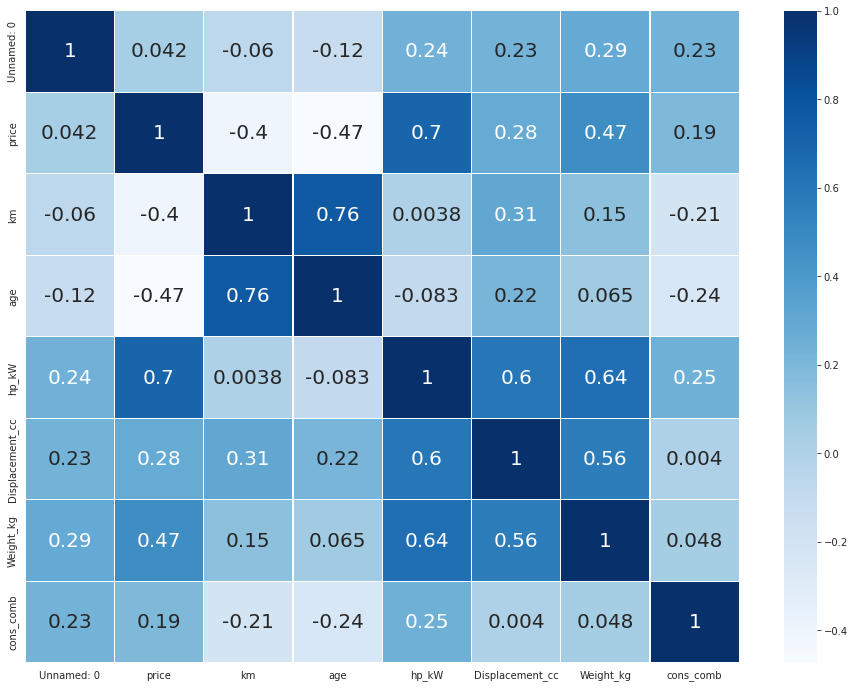

In [98]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_num.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 20});

In [99]:
def color_correlation(val):
    
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_num.corr().style.applymap(color_correlation)

,Unnamed: 0,price,km,age,hp_kW,Displacement_cc,Weight_kg,cons_comb
Unnamed: 0,1.000000,0.041852,-0.059921,-0.116414,0.242744,0.231506,0.287091,0.230021
price,0.041852,1.000000,-0.399443,-0.473689,0.697571,0.282075,0.468264,0.188959
km,-0.059921,-0.399443,1.000000,0.758370,0.003795,0.306792,0.147246,-0.207237
age,-0.116414,-0.473689,0.758370,1.000000,-0.082561,0.215304,0.065081,-0.239404
hp_kW,0.242744,0.697571,0.003795,-0.082561,1.000000,0.596101,0.638545,0.247146
Displacement_cc,0.231506,0.282075,0.306792,0.215304,0.596101,1.000000,0.563594,0.003963
Weight_kg,0.287091,0.468264,0.147246,0.065081,0.638545,0.563594,1.000000,0.048119
cons_comb,0.230021,0.188959,-0.207237,-0.239404,0.247146,0.003963,0.048119,1.000000


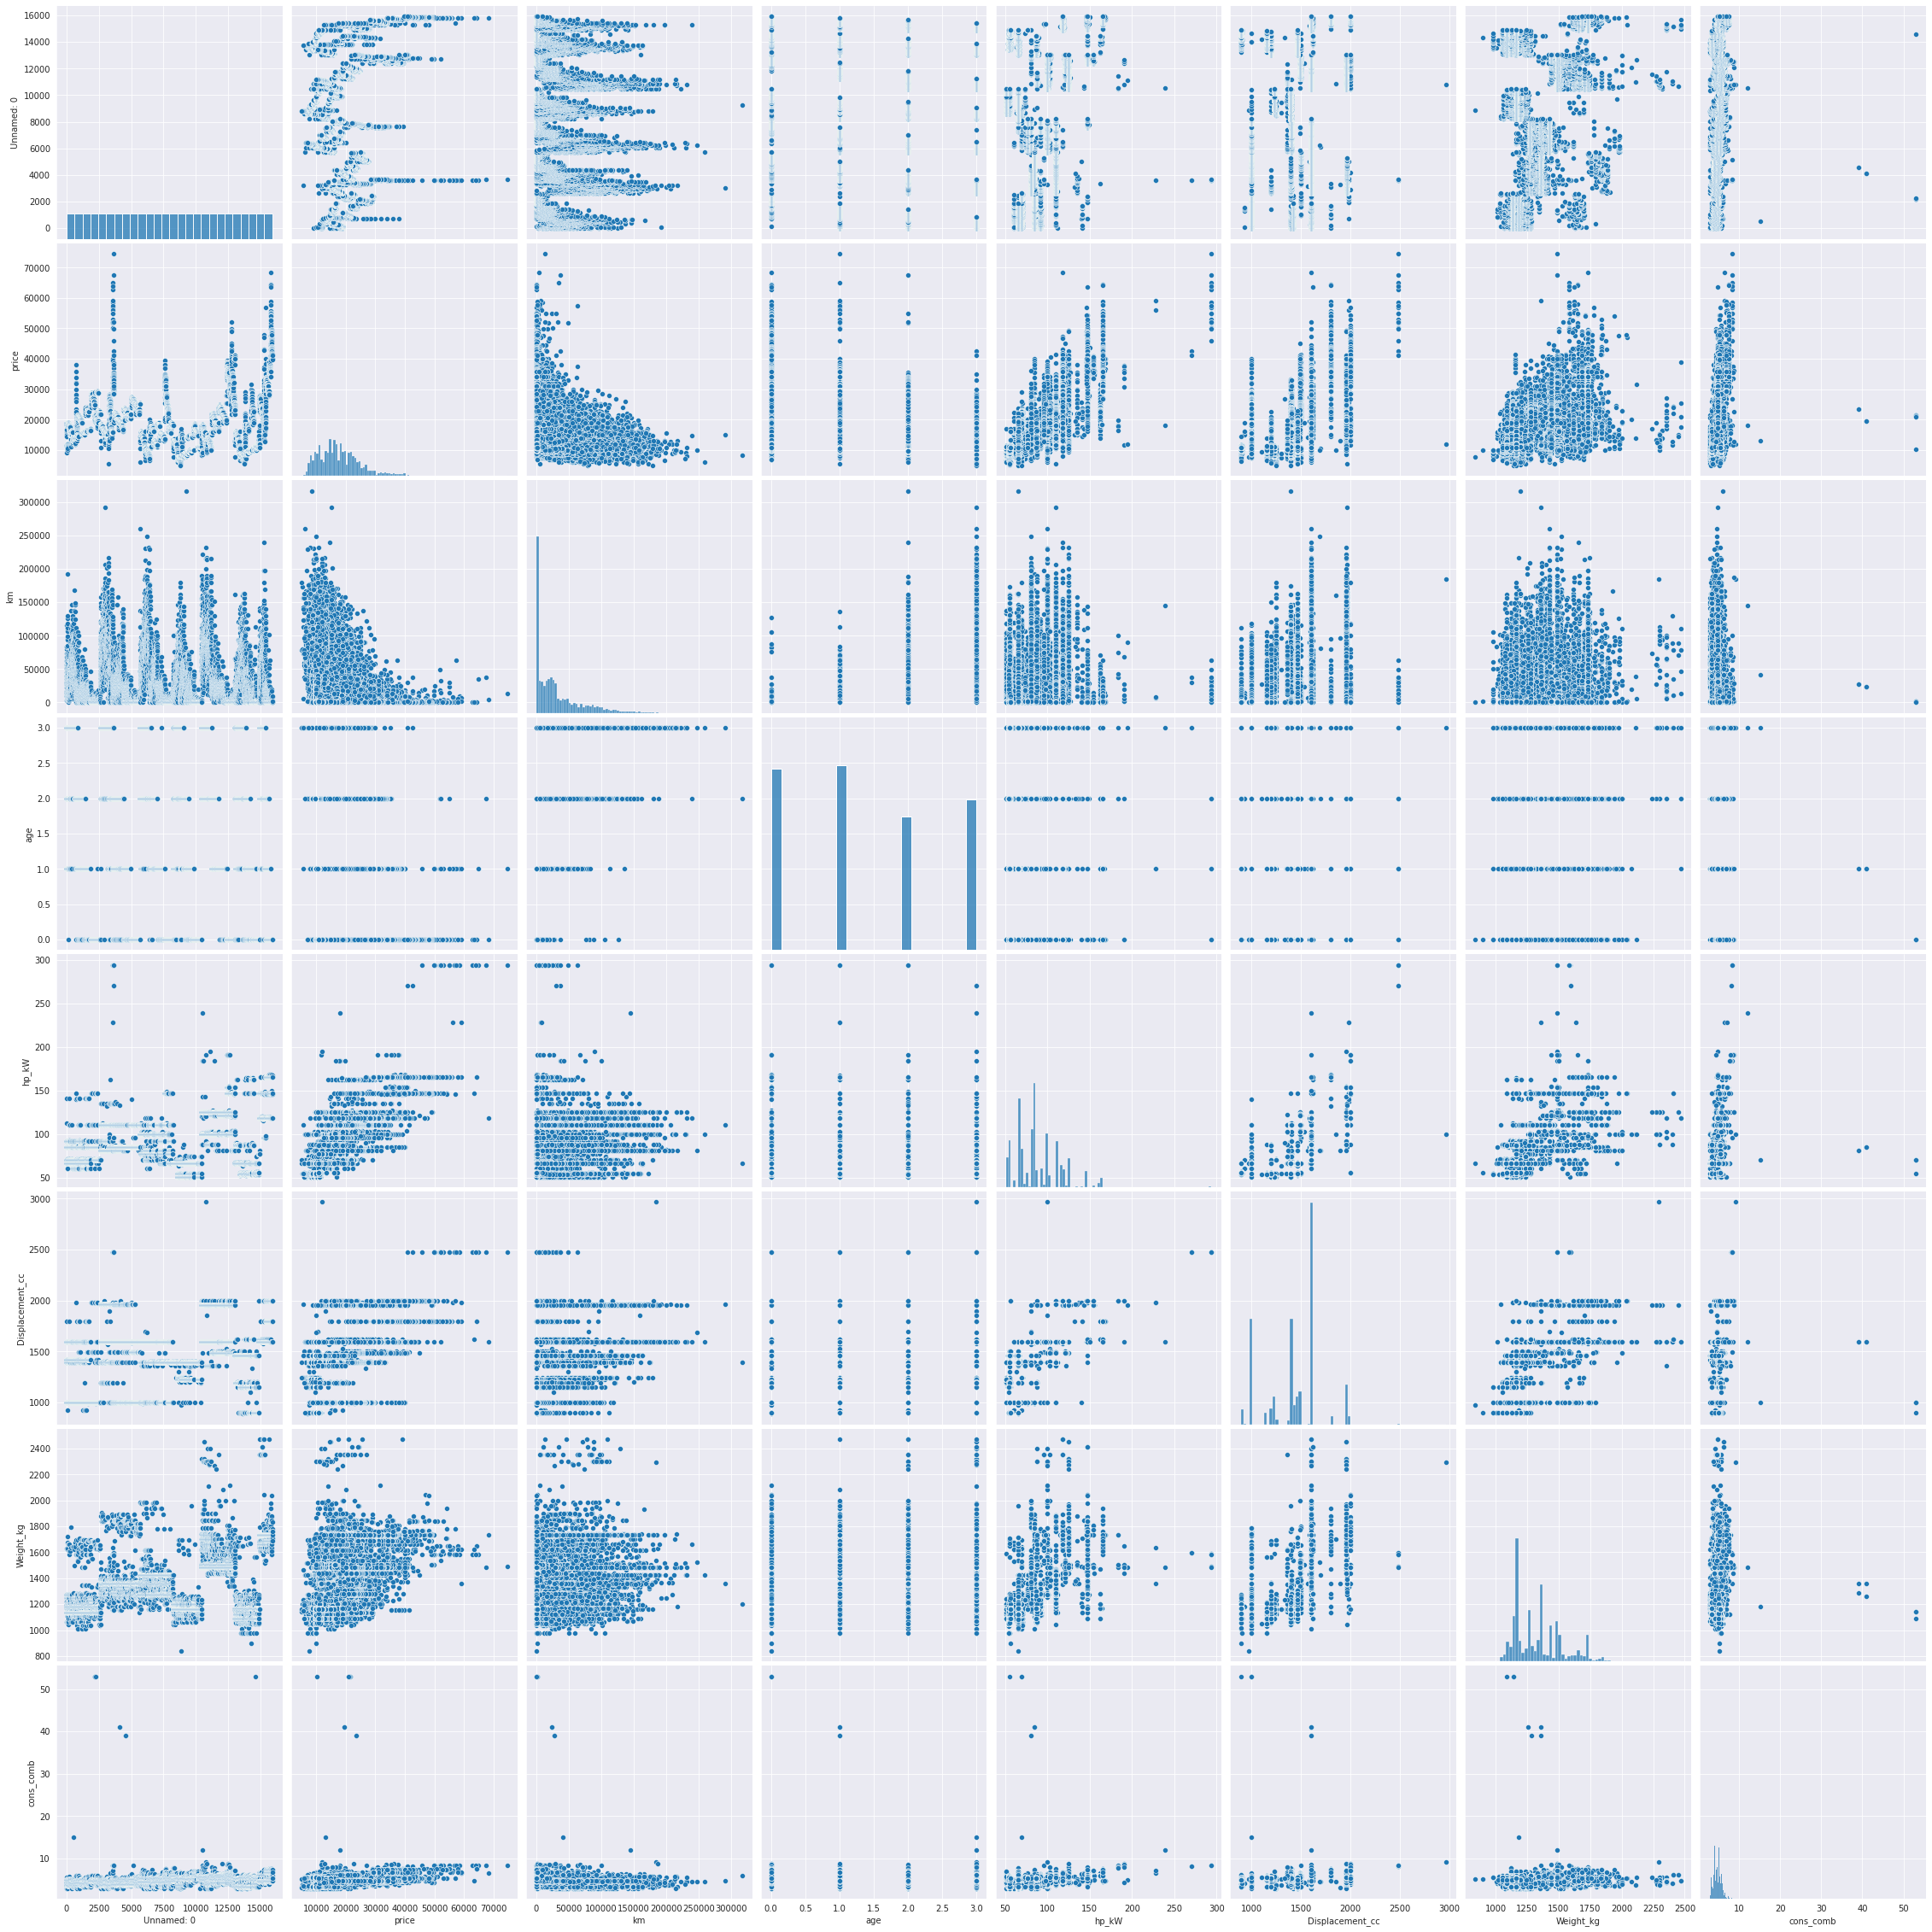

In [100]:
sns.pairplot(df_num, size=4);

DUMMY OPERATION

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15909 non-null  int64  
 1   make_model           15909 non-null  object 
 2   body_type            15909 non-null  object 
 3   price                15909 non-null  int64  
 4   km                   15909 non-null  float64
 5   Type                 15909 non-null  object 
 6   Cylinders            15909 non-null  object 
 7   Drive_chain          15909 non-null  object 
 8   Fuel                 15909 non-null  object 
 9   Comfort_Convenience  15909 non-null  object 
 10  Entertainment_Media  15909 non-null  object 
 11  Extras               15909 non-null  object 
 12  Safety_Security      15909 non-null  object 
 13  Gears                15909 non-null  object 
 14  age                  15909 non-null  float64
 15  hp_kW                15909 non-null 

In [102]:
df.shape

(15909, 20)

In [103]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [104]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep=",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep=",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep=",").add_prefix("ss_"))

In [105]:
df.drop(["Comfort_Convenience", "Entertainment_Media", "Extras", "Safety_Security"], axis=1, inplace=True)

In [106]:
df.shape

(15909, 110)

In [107]:
df_final = pd.get_dummies(df, drop_first=True)


In [108]:
df_final.shape

(15909, 142)

In [109]:
df_final.head().T

,0,1,2,3,4
Unnamed: 0,0.00,1.00,2.00,3.00,4.00
price,15770.00,14500.00,14640.00,14500.00,16790.00
km,56013.00,80000.00,83450.00,73000.00,16200.00
age,3.00,2.00,3.00,3.00,3.00
hp_kW,66.00,141.00,85.00,66.00,66.00
...,...,...,...,...,...
Gears_6.0,0.00,0.00,0.00,1.00,0.00
Gears_7.0,0.00,1.00,0.00,0.00,0.00
Gears_8.0,0.00,0.00,0.00,0.00,0.00
Gears_9.0,0.00,0.00,0.00,0.00,0.00


In [110]:
df_final.columns

Index(['Unnamed: 0', 'price', 'km', 'age', 'hp_kW', 'Displacement_cc',
       'Weight_kg', 'cons_comb', 'cc_Air conditioning', 'cc_Air suspension',
       ...
       'Gears_2.0', 'Gears_3.0', 'Gears_4.0', 'Gears_5.0', 'Gears_50.0',
       'Gears_6.0', 'Gears_7.0', 'Gears_8.0', 'Gears_9.0',
       'Upholstery_type_Part/Full Leather'],
      dtype='object', length=142)

In [113]:
df_final.to_csv("final_scout_dummy.csv", index=False)

In [114]:
pd.read_csv('final_scout_dummy.csv')

,Unnamed: 0,price,km,age,hp_kW,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,...,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Cylinders_1.0,Cylinders_2.0,Cylinders_3.0,Cylinders_4.0,Cylinders_5.0,Cylinders_6.0,Cylinders_8.0,Drive_chain_front,Drive_chain_rear,Fuel_Diesel,Fuel_LPG/CNG,Gears_1.0,Gears_2.0,Gears_3.0,Gears_4.0,Gears_5.0,Gears_50.0,Gears_6.0,Gears_7.0,Gears_8.0,Gears_9.0,Upholstery_type_Part/Full Leather
0,0,15770,56013.00,3.00,66.00,1422.00,1220.00,3.80,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,...,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,14500,80000.00,2.00,141.00,1798.00,1255.00,5.60,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,...,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,14640,83450.00,3.00,85.00,1598.00,1135.00,3.80,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,14500,73000.00,3.00,66.00,1422.00,1195.00,3.80,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,...,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,4,16790,16200.00,3.00,66.00,1422.00,1135.00,4.10,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,...,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,15914,39950,1647.36,0.00,147.00,1997.00,1758.00,5.30,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,...,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
15905,15915,39885,9900.00,0.00,165.00,1798.00,1708.00,7.40,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,1,...,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15906,15916,39875,15.00,0.00,146.00